

Articles we took inspiration from include 'Evaluation of statistical and machine learning models for time series prediction: Identifying the state-of-the-art and the best conditions for the use of each model' by
Antionio Rafael Sabino Parmezan, Vinivius M.A. Souza and Gustavo E.A.P.A Batista. They mentioned in their limitations that they restricted their study to predictors focusing on univariate data and that they would
aim to investigate multivariate context which remains unaddressed in many literature. (Parmezan et al., 2019) Thus we used multivariate data to train our model to address this limitation. Firstly,  we use the data available in the dataset such as trading volume, we also created lag features to increase available features and supplement the model.



Another article we took inspiration from is 'Applying machine learning algorithms to predict the stock price trend in the stock market - The case of Vietnam' by Tran Phuoc, Pham Thi Kim Anh, Phan Huy Tam and Chien V. Nguyen. The study states that although the LSTM model they used had good predictive levels, they wanted to test out other machine learning algorithms that have significantly advanced recently and are utilised greatly in the financial field such as Random Forest and Support Vector Machine. (Phuoc et al., 2024) Thus we decided to implement Random Forest alongside our LSTM model to cover this limitation.






**Reference List**

Parmezan, A. R. S., Souza, V. M. A., & Batista, G. E. A. P. A. (2019, January 30). Evaluation of statistical and Machine Learning Models for time series prediction: Identifying the state-of-the-art and the best conditions for the use of each model. Science Direct. https://www.sciencedirect.com/science/article/abs/pii/S0020025519300945


Phuoc, T., Thi Kim Anh, P., Huy Tam, P., & V. Nguyen, C. (2024, March 12). Applying machine learning algorithms to predict the stock price trend in the stock market – the case of Vietnam. Nature. https://www.nature.com/articles/s41599-024-02807-x

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data.csv')
dfsp500=pd.read_csv('/content/drive/MyDrive/sp500wiki.csv')
df2=pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)
df2.sort_values('Date', inplace=True)
# Impute missing values with 0
df_filled = df.fillna(0)
df2_filled = df2.fillna(0)


label_encoders = {}

# List of columns to encode
columns_to_encode = ['Symbol', 'GICS Sector', 'GICS Sub-Industry']

# Encode each column and store the result in a new column in the same DataFrame
for column in columns_to_encode:
    le = LabelEncoder()
    df_filled[column + '_encoded'] = le.fit_transform(df_filled[column])
    df2_filled[column + '_encoded'] = le.fit_transform(df2_filled[column])
    label_encoders[column] = le
# Generate lagged features for the past 5 days for 'Close' and 'Volume'
for lag in range(1, 6):
    df_filled[f'Close_lag_{lag}'] = df_filled.groupby('Symbol')['Close'].shift(lag)
    df_filled[f'Volume_lag_{lag}'] = df_filled.groupby('Symbol')['Volume'].shift(lag)
    df_filled[f'News - Volume_lag_{lag}'] = df_filled.groupby('Symbol')['News - Volume'].shift(lag)
    df_filled[f'News - Positive Sentiment_lag_{lag}'] = df_filled.groupby('Symbol')['News - Positive Sentiment'].shift(lag)
    df_filled[f'News - Negative Sentiment_lag_{lag}'] = df_filled.groupby('Symbol')['News - Negative Sentiment'].shift(lag)
    df_filled[f'News - New Products_lag_{lag}'] = df_filled.groupby('Symbol')['News - New Products'].shift(lag)

#df_filled['SMA_5'] = df_filled.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=5).mean())
# Calculate moving averages and other rolling statistics ##DF2
for lag in range(1, 8):
    df2_filled[f'Close_lag_{lag}'] = df2_filled.groupby('Symbol')['Close'].shift(lag)
    df2_filled[f'Volume_lag_{lag}'] = df2_filled.groupby('Symbol')['Volume'].shift(lag)
df2_filled['7_DAYS_MA'] = df2_filled.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=7).mean())
df2_filled['14_DAYS_MA'] = df2_filled.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=14).mean())
df2_filled['21_DAYS_MA'] = df2_filled.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=21).mean())
df2_filled['7_DAYS_STD_DEV'] = df2_filled.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=7).std())
#df2_filled['SMA_5'] = df2_filled['Close'].rolling(window=5).mean()
df2_filled['SMA_5'] = df2_filled.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=5).mean())
# Remove rows with NaN values after lagging (these will be the first few rows for each symbol)
df_cleaned = df_filled.dropna()
df2_cleaned = df2_filled.dropna()

# Extract year, month, and day from the date for seasonality analysis
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Day'] = df_cleaned['Date'].dt.day
df_cleaned['Day_of_Week'] = df_cleaned['Date'].dt.day_name()

# Display the structure of the dataset after preprocessing
#df_cleaned.head()
df2_cleaned.head()

<ipython-input-7-44cda799323e>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year
<ipython-input-7-44cda799323e>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.month
<ipython-input-7-44cda799323e>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Date,Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,News - All News Volume,News - Volume,News - Positive Sentiment,...,Volume_lag_5,Close_lag_6,Volume_lag_6,Close_lag_7,Volume_lag_7,7_DAYS_MA,14_DAYS_MA,21_DAYS_MA,7_DAYS_STD_DEV,SMA_5
12368,2020-10-28,76.400002,76529900,AMD,AMD,Information Technology,Semiconductors,582522.0,783.0,36.0,...,36426400.0,81.559998,38219400.0,82.000000,36689100.0,79.949999,81.773570,82.729048,2.098468,79.778000
51617,2020-10-28,41.980000,20256200,CMCSA,Comcast,Communication Services,Cable & Satellite,582522.0,91.0,3.0,...,13198900.0,44.270000,13137400.0,44.330002,17520400.0,44.021429,44.654286,44.932857,1.091077,43.872000
125377,2020-10-28,161.419998,4947700,LOW,Lowe's,Consumer Discretionary,Home Improvement Retail,582522.0,68.0,1.0,...,3431800.0,177.089996,3603800.0,175.130005,4073200.0,169.952857,172.396428,170.759047,5.437179,167.616000
46325,2020-10-28,71.169998,1207800,CINF,Cincinnati Financial,Financials,Property & Casualty Insurance,582522.0,28.0,0.0,...,652800.0,79.820000,556500.0,77.669998,453100.0,77.154285,78.141428,78.488095,4.185392,75.193999
205483,2020-10-28,14.300000,4895600,VTRS,Viatris,Health Care,Pharmaceuticals,582522.0,0.0,0.0,...,3117600.0,15.310000,2838500.0,15.420000,3190000.0,15.078572,15.370000,15.251905,0.531144,15.020000


In [ ]:
# Find the date to split on
unique_dates = df_cleaned['Date'].unique()
split_date = unique_dates[int(len(unique_dates) * 0.8)]
# Find the date to split on #df2
unique_dates2 = df2_cleaned['Date'].unique()
split_date2 = unique_dates2[int(len(unique_dates2) * 0.8)]
# Create the training and testing sets
train_data = df_cleaned[df_cleaned['Date'] < split_date]
test_data = df_cleaned[df_cleaned['Date'] >= split_date]
# Create the training and testing sets #df2
train_data2 = df2_cleaned[df2_cleaned['Date'] < split_date2]
test_data2 = df2_cleaned[df2_cleaned['Date'] >= split_date2]

print(f"Latest date in training set: {train_data['Date'].max()}")
print(f"Earliest date in testing set: {test_data['Date'].min()}")

print(f"Latest date in training set2: {train_data2['Date'].max()}")
print(f"Earliest date in testing set2: {test_data2['Date'].min()}")

Latest date in training set: 2022-02-23 00:00:00
Earliest date in testing set: 2022-02-24 00:00:00
Latest date in training set2: 2022-02-28 00:00:00
Earliest date in testing set2: 2022-03-01 00:00:00


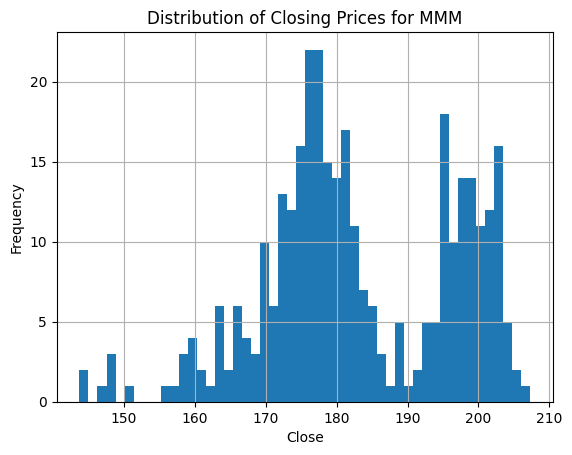

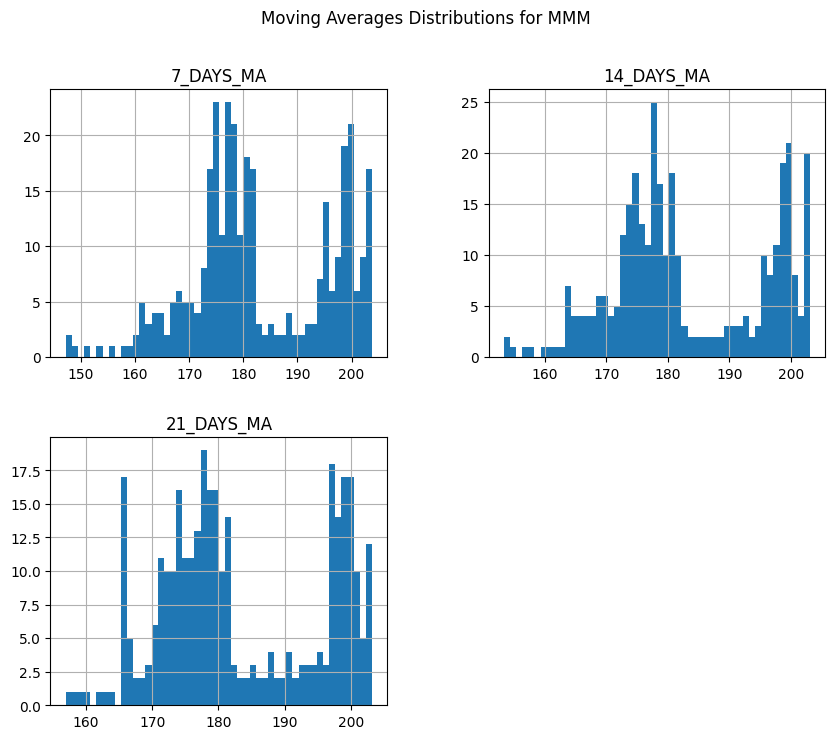

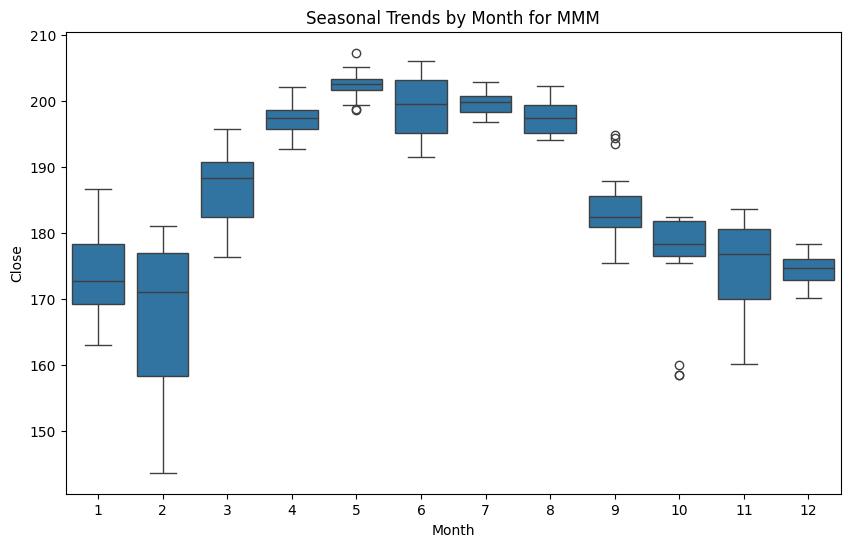

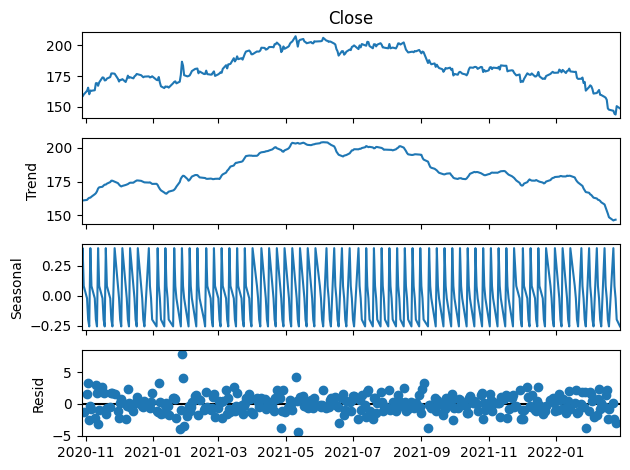

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a single stock to visualize
symbol_to_visualize = 'MMM'  # Replace with the actual symbol ID or name

# Filter the data for the selected stock
single_stock_data = train_data2[train_data2['Symbol'] == symbol_to_visualize]
#print(single_stock_data)
# Plot histogram for closing prices for the selected stock
single_stock_data['Close'].hist(bins=50)
plt.title(f'Distribution of Closing Prices for {symbol_to_visualize}')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.show()

# Plot histograms for moving averages for the selected stock
single_stock_data[['7_DAYS_MA', '14_DAYS_MA', '21_DAYS_MA']].hist(bins=50, figsize=(10, 8))
plt.suptitle(f'Moving Averages Distributions for {symbol_to_visualize}')
plt.show()

if not single_stock_data.empty:
    # Visualize seasonal trends for closing prices by day of the week
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(x='Day_of_Week', y='Close', data=single_stock_data)
    #plt.title(f'Seasonal Trends by Day of the Week for {symbol_to_visualize}')
    #plt.show()

    # Visualize seasonal trends for closing prices by month
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=single_stock_data['Date'].dt.month, y='Close', data=single_stock_data)
    plt.title(f'Seasonal Trends by Month for {symbol_to_visualize}')
    plt.xlabel('Month')
    plt.show()

    # For cyclical trends, you can perform a time-series decomposition if you expect such behavior
    from statsmodels.tsa.seasonal import seasonal_decompose

    # You may need to set the frequency for the time series if not already defined (e.g., freq='B' for business days)
    single_stock_data.set_index('Date', inplace=True)
    result = seasonal_decompose(single_stock_data['Close'], model='additive', period=5)  # period can be adjusted

    result.plot()
    plt.show()

else:
    print(f"No data found for symbol: {symbol_to_visualize}")

In [ ]:
print(f"Latest date in training set: {train_data['Date'].max()}")
print(f"Earliest date in testing set: {test_data['Date'].min()}")

Latest date in training set: 2022-02-23 00:00:00
Earliest date in testing set: 2022-02-24 00:00:00


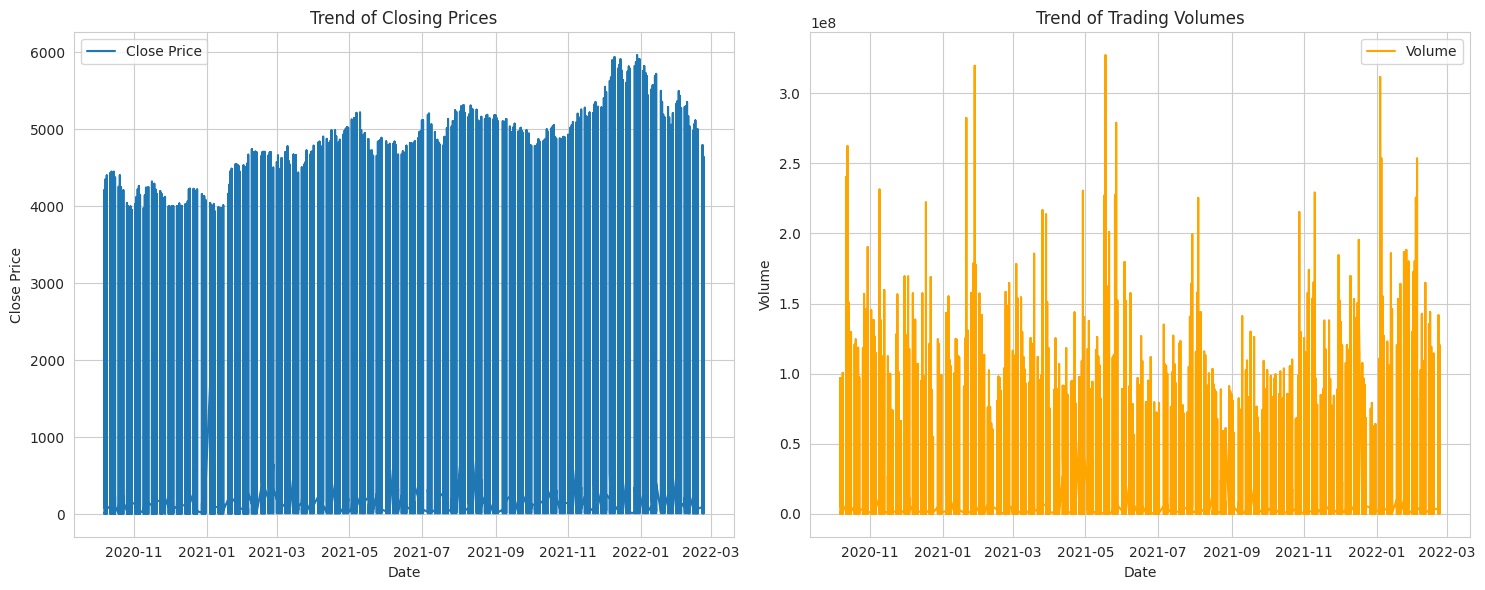

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the trend of closing prices and volumes over time
plt.figure(figsize=(15, 6))

# Trend of closing prices
plt.subplot(1, 2, 1)
plt.plot(train_data['Date'], train_data['Close'], label='Close Price')
plt.title('Trend of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Trend of volumes
plt.subplot(1, 2, 2)
plt.plot(train_data['Date'], train_data['Volume'], label='Volume', color='orange')
plt.title('Trend of Trading Volumes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming monthly_prices, Daily_prices, and monthly_volumes are already computed

# Monthly Seasonality of Closing Prices
plt.figure(figsize=(10, 6))
monthly_prices.plot(kind='bar')
plt.title('Average Monthly Closing Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()

# Daily Seasonality of Closing Prices
plt.figure(figsize=(10, 6))
Daily_prices.plot(kind='bar')
plt.title('Average Daily Closing Prices')
plt.xlabel('Day of the Week')
plt.ylabel('Average Close Price')
plt.show()

# Monthly Seasonality of Trading Volumes
plt.figure(figsize=(10, 6))
monthly_volumes.plot(kind='bar', color='orange')
plt.title('Average Monthly Trading Volumes')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.show()

NameError: name 'monthly_prices' is not defined

<Figure size 1000x600 with 0 Axes>

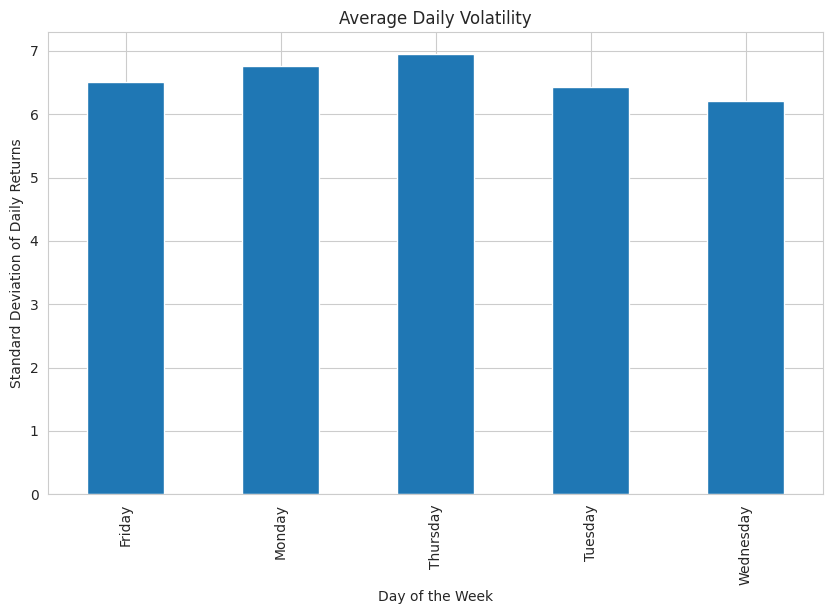

In [ ]:
daily_returns = df_cleaned.groupby('Day_of_Week')['Close'].pct_change()
daily_volatility = daily_returns.groupby(df_cleaned['Day_of_Week']).std()

plt.figure(figsize=(10, 6))
daily_volatility.plot(kind='bar')
plt.title('Average Daily Volatility')
plt.xlabel('Day of the Week')
plt.ylabel('Standard Deviation of Daily Returns')
plt.show()

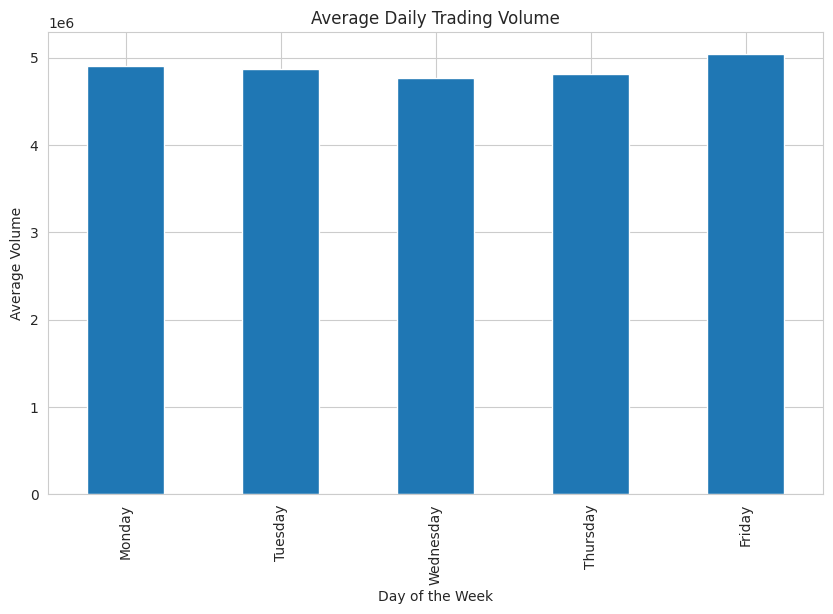

In [ ]:
# Group by 'Day_of_Week' and calculate the mean of 'Volume'
average_daily_volume = df_cleaned.groupby('Day_of_Week')['Volume'].mean()

# Sort the index to ensure the days are in order
average_daily_volume = average_daily_volume.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Plotting the results
plt.figure(figsize=(10, 6))
average_daily_volume.plot(kind='bar')
plt.title('Average Daily Trading Volume')
plt.xlabel('Day of the Week')
plt.ylabel('Average Volume')
plt.show()

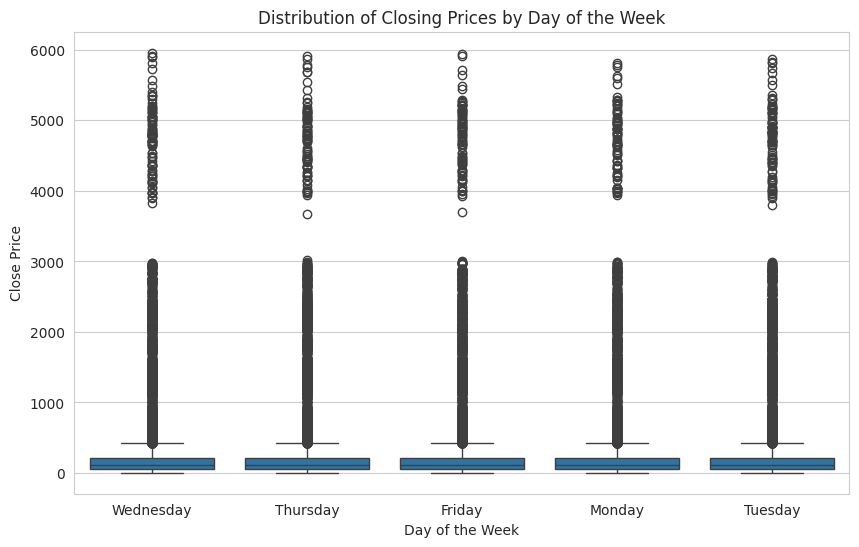

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Close', data=df_cleaned)
plt.title('Distribution of Closing Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Close Price')
plt.show()

<ipython-input-29-1ef22cc8c3f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Prev_Close'] = df_cleaned.groupby('Symbol')['Close'].shift(1)
<ipython-input-29-1ef22cc8c3f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price_Change'] = df_cleaned['Close'] - df_cleaned['Prev_Close']


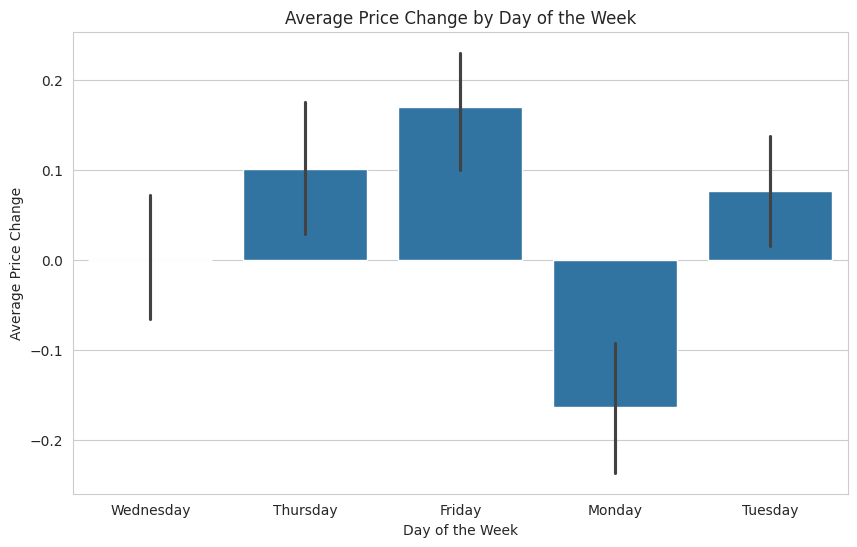

In [ ]:
df_cleaned['Prev_Close'] = df_cleaned.groupby('Symbol')['Close'].shift(1)
df_cleaned['Price_Change'] = df_cleaned['Close'] - df_cleaned['Prev_Close']

plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Price_Change', data=df_cleaned, estimator=np.mean)
plt.title('Average Price Change by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price Change')
plt.show()

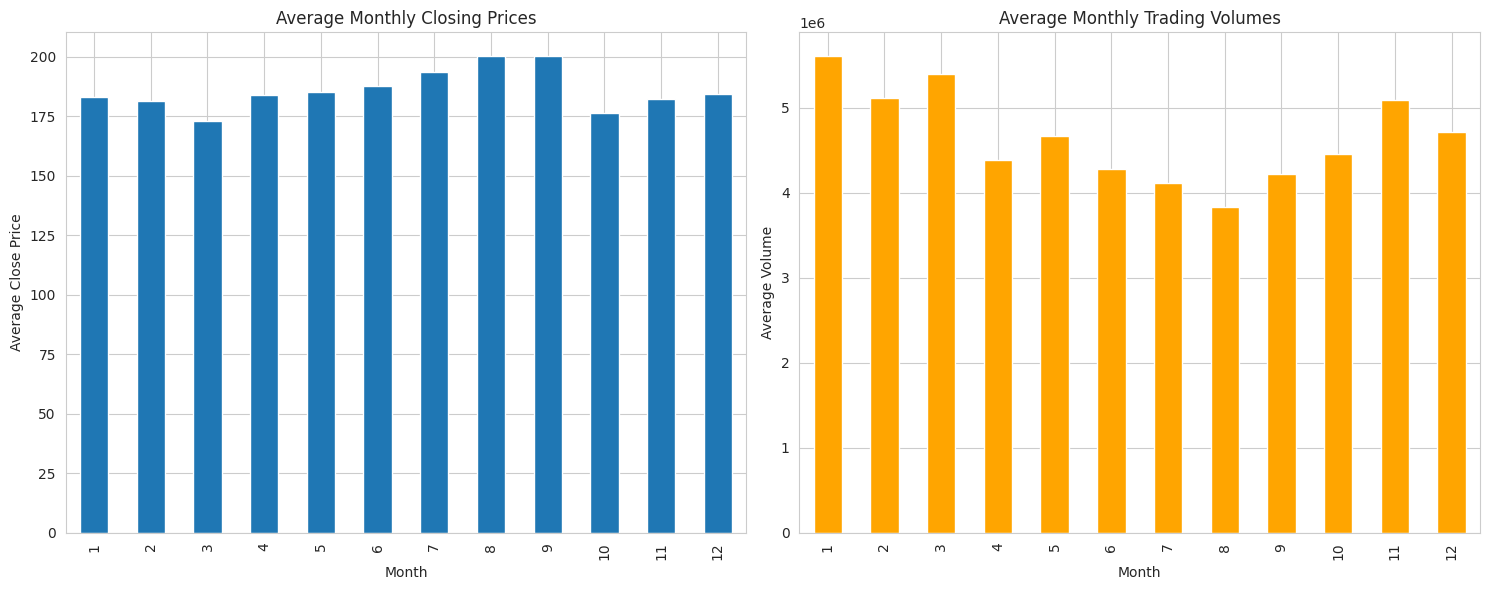

In [ ]:
# Extract year, month, and day from the date for seasonality analysis
#train_data['Year'] = train_data['Date'].dt.year
#train_data['Month'] = train_data['Date'].dt.month
#train_data['Day'] = train_data['Date'].dt.day

# Monthly Seasonality of Closing Prices
monthly_prices = train_data.groupby('Month')['Close'].mean()
# Daily Seasonality of Closing Prices
Daily_prices = train_data.groupby('Day_of_Week')['Close'].mean()

# Monthly Seasonality of Trading Volumes
monthly_volumes = train_data.groupby('Month')['Volume'].mean()

plt.figure(figsize=(15, 6))

# Monthly Seasonality of Closing Prices
plt.subplot(1, 2, 1)
monthly_prices.plot(kind='bar')
plt.title('Average Monthly Closing Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
# Daily Seasonality of Closing Prices
plt.subplot(1, 2, 2)
Daily_prices.plot(kind='bar')
plt.title('Average Daily Closing Prices')
plt.xlabel('Day_of_Week')
plt.ylabel('Average Close Price')
# Monthly Seasonality of Trading Volumes
plt.subplot(1, 2, 2)
monthly_volumes.plot(kind='bar', color='orange')
plt.title('Average Monthly Trading Volumes')
plt.xlabel('Month')
plt.ylabel('Average Volume')

plt.tight_layout()
plt.show()

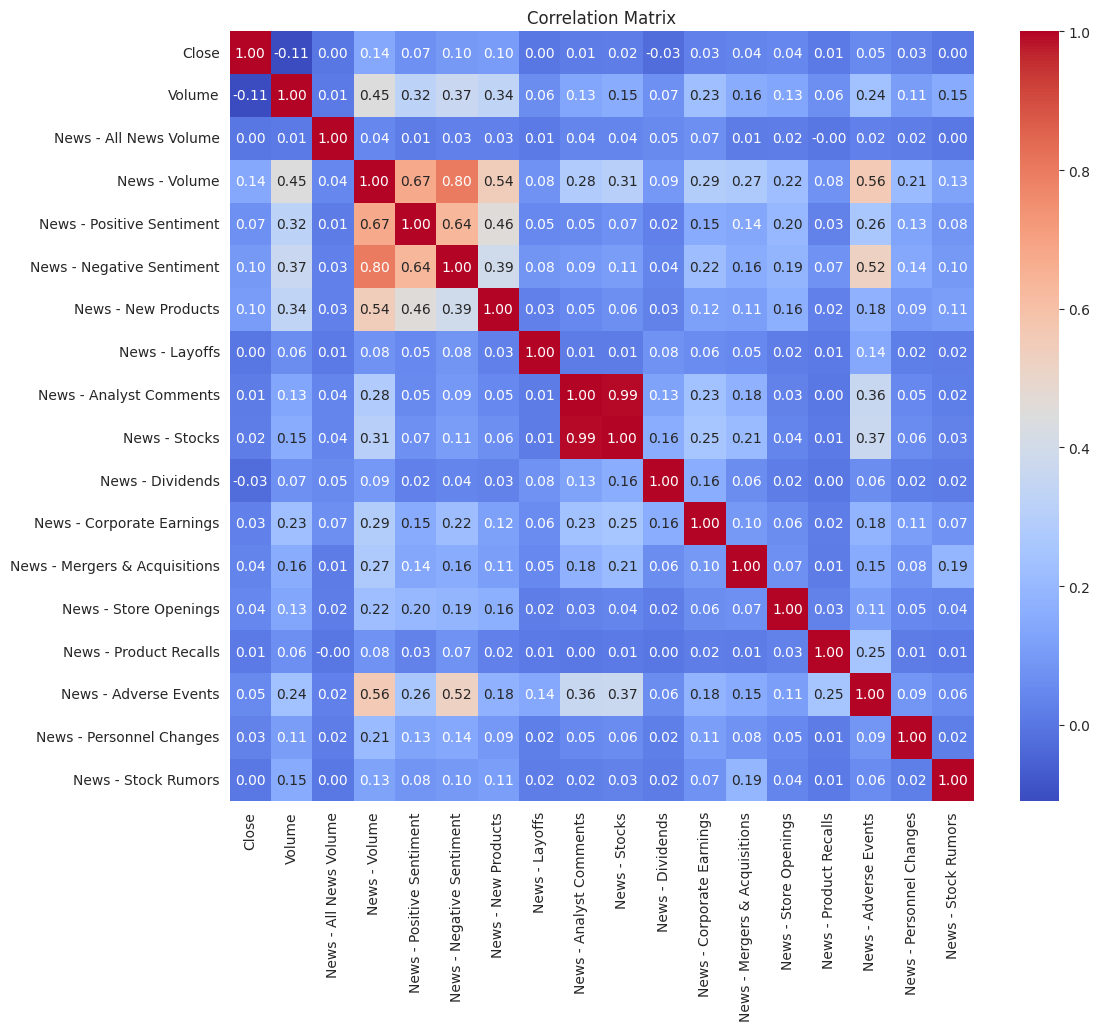

In [ ]:
# Select relevant features for correlation analysis
features_for_correlation = ['Close', 'Volume'] + [
    col for col in train_data.columns if 'News' in col and 'lag' not in col
]

# Compute the correlation matrix
correlation_matrix = train_data[features_for_correlation].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Linear Regression model 1 as a baseline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Selecting the features and target variable
#X = train_data.drop(['Date', 'Close', 'Security', "Day_of_Week", "News - All News Volume", "News - Layoffs", "News - Analyst Comments",
#                     "News - Stocks", "News - Dividends"], axis=1)
base_columns=['Volume', 'News - Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 'News - New Products']
close_lag_columns = [f'Close_lag_{lag}' for lag in range(1, 6)]
encoded_columns = ['Symbol_encoded', 'GICS Sector_encoded', 'GICS Sub-Industry_encoded']
base_lag_columns = []
for col in base_columns:
    base_lag_columns.extend([f'{col}_lag_{lag}' for lag in range(1, 6)])

# Combine base feature columns with lagged feature columns
feature_columns = base_columns + close_lag_columns + base_lag_columns
X = train_data[feature_columns]
y = train_data['Close']



# Training a Linear Regression model
linear_model = LinearRegression()



# TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
unique_dates = train_data['Date'].unique()
rmse_scores = []
mae_scores = []
mape_scores = []
# Iterate through the splits created by TimeSeriesSplit
for train_indices, valid_indices in tscv.split(unique_dates):
    # Find the actual date range for the current split
    train_end_date = unique_dates[train_indices[-1]]
    valid_end_date = unique_dates[valid_indices[-1]] if valid_indices[-1] < len(unique_dates) - 1 else unique_dates[-1]

    # Create the training and test sets based on these dates
    train_set = train_data[train_data['Date'] <= train_end_date]
    valid_set = train_data[(train_data['Date'] > train_end_date) & (train_data['Date'] <= valid_end_date)]

    # Prepare the feature matrices and target vectors
    X_train = train_set[feature_columns]
    y_train = train_set['Close']
    X_valid = valid_set[feature_columns]
    y_valid = valid_set['Close']

    # Train the model on the training set
    linear_model.fit(X_train, y_train)

    # Evaluate the model on the valid set
    y_pred = linear_model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(f"Fold RMSE: {rmse}")
    rmse_scores.append(rmse)
    mae = mean_absolute_error(y_valid, y_pred)
    mae_scores.append(mae)

    mape = np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100
    mape_scores.append(mape)
average_rmse = np.mean(rmse_scores)

average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)

print('RMSE scores for each fold:', rmse_scores)
print('MAE scores for each fold:', mae_scores)
print('MAPE scores for each fold:', mape_scores)
print('Average RMSE from cross-validation:', average_rmse)
print('Average MAE from cross-validation:', average_mae)
print('Average MAPE from cross-validation:', average_mape)

# First, ensure that your linear regression model is trained on the entire training set
linear_model.fit(X, y)  # X and y derived from train_data2

# Now, prepare your test set features
X_test = test_data[feature_columns]

# Predict on the test set
y_test_pred = linear_model.predict(X_test)

# Calculate the RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(test_data['Close'], y_test_pred))
print(f"Test RMSE: {rmse_test}")
























Fold RMSE: 7.038355253427463
Fold RMSE: 5.819395920549005
Fold RMSE: 5.376964300501455
Fold RMSE: 6.521130779722718
Fold RMSE: 8.90157568888513
RMSE scores for each fold: [7.038355253427463, 5.819395920549005, 5.376964300501455, 6.521130779722718, 8.90157568888513]
MAE scores for each fold: [2.7235867767376276, 2.106507457124078, 2.0637577022994287, 2.5143690922356785, 3.1902243876507987]
MAPE scores for each fold: [1.713698197164479, 1.204950268359935, 1.1868646527527447, 1.2943731255848439, 1.5399966746471523]
Average RMSE from cross-validation: 6.7314843886171545
Average MAE from cross-validation: 2.5196890832095225
Average MAPE from cross-validation: 1.3879765837018312
Test RMSE: 9.200217904439736


In [ ]:
#Linear Regression model as a baseline for df2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Selecting the features and target variable
#X = train_data.drop(['Date', 'Close', 'Security', "Day_of_Week", "News - All News Volume", "News - Layoffs", "News - Analyst Comments",
#                     "News - Stocks", "News - Dividends"], axis=1)
base_columns=['Volume']
ma_columns=['7_DAYS_MA','14_DAYS_MA','21_DAYS_MA','7_DAYS_STD_DEV']
close_lag_columns = [f'Close_lag_{lag}' for lag in range(1, 8)]
encoded_columns = ['Symbol_encoded', 'GICS Sector_encoded', 'GICS Sub-Industry_encoded']
base_lag_columns = []
for col in base_columns:
    base_lag_columns.extend([f'{col}_lag_{lag}' for lag in range(1, 6)])

# Combine base feature columns with lagged feature columns
feature_columns2 = ma_columns  + encoded_columns

X = train_data2[feature_columns2]
y = train_data2['Close']

# Training a Linear Regression model
linear_model2 = LinearRegression()

# Initialize TimeSeriesSplit with n_splits=5
tscv = TimeSeriesSplit(n_splits=5)

# Get the unique dates from train_data2
unique_dates = train_data2['Date'].unique()

rmse_scoresl2 = []
mae_scoresl2 = []
mape_scoresl2 = []
# Iterate through the splits created by TimeSeriesSplit
for train_indices, valid_indices in tscv.split(unique_dates):
    # Find the actual date range for the current split
    train_end_date = unique_dates[train_indices[-1]]
    valid_end_date = unique_dates[valid_indices[-1]] if valid_indices[-1] < len(unique_dates) - 1 else unique_dates[-1]

    # Create the training and test sets based on these dates
    train_set = train_data2[train_data2['Date'] <= train_end_date]
    valid_set = train_data2[(train_data2['Date'] > train_end_date) & (train_data2['Date'] <= valid_end_date)]

    # Prepare the feature matrices and target vectors
    X_train = train_set[feature_columns2]
    y_train = train_set['Close']
    X_valid = valid_set[feature_columns2]
    y_valid = valid_set['Close']

    # Train the model on the training set
    linear_model2.fit(X_train, y_train)

    # Evaluate the model on the valid set
    y_pred = linear_model2.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(f"Fold RMSE: {rmse}")
    rmse_scoresl2.append(rmse)
    mae = mean_absolute_error(y_valid, y_pred)
    mae_scoresl2.append(mae)

    mape = np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100
    mape_scoresl2.append(mape)
average_rmse = np.mean(rmse_scoresl2)

average_mae = np.mean(mae_scoresl2)
average_mape = np.mean(mape_scoresl2)

print('RMSE scores for each fold:', rmse_scoresl2)
print('MAE scores for each fold:', mae_scoresl2)
print('MAPE scores for each fold:', mape_scoresl2)
print('Average RMSE from cross-validation:', average_rmse)
print('Average MAE from cross-validation:', average_mae)
print('Average MAPE from cross-validation:', average_mape)

# First, ensure that your linear regression model is trained on the entire training set
linear_model2.fit(X, y)  # X and y derived from train_data2

# Now, prepare your test set features
X_test = test_data2[feature_columns2]

# Predict on the test set
y_test_pred = linear_model2.predict(X_test)

# Calculate the RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(test_data2['Close'], y_test_pred))
print(f"Test RMSE: {rmse_test}")

Fold RMSE: 8.483341638622733
Fold RMSE: 7.122087914507727
Fold RMSE: 6.7287193311328135
Fold RMSE: 8.662847935078013
Fold RMSE: 12.501729684639333
RMSE scores for each fold: [8.483341638622733, 7.122087914507727, 6.7287193311328135, 8.662847935078013, 12.501729684639333]
MAE scores for each fold: [3.2811197030734296, 2.6400962291816894, 2.5648049518560896, 3.389142200711158, 4.405072238692684]
MAPE scores for each fold: [1.9751847070828585, 1.4726590414913738, 1.4393546306998688, 1.6764793585548172, 2.044319859679929]
Average RMSE from cross-validation: 8.699745300796124
Average MAE from cross-validation: 3.25604706470301
Average MAPE from cross-validation: 1.7215995195017697
Test RMSE: 11.453575939292294


In [ ]:
##LSTM2 using moving averages + volume and volume lags
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

from keras.layers import LSTM, Dense, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

# Assuming train_data and test_data are already defined

# 1. Feature Scaling
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
base_columns=['Volume']
ma_columns=['7_DAYS_MA','14_DAYS_MA','21_DAYS_MA','7_DAYS_STD_DEV']
close_lag_columns = [f'Close_lag_{lag}' for lag in range(1, 8)]
encoded_columns = ['Symbol_encoded', 'GICS Sector_encoded', 'GICS Sub-Industry_encoded']
base_lag_columns = []
for col in base_columns:
    base_lag_columns.extend([f'{col}_lag_{lag}' for lag in range(1, 8)])

# Combine base feature columns with lagged feature columns
feature_columns2 = ma_columns + encoded_columns

X_train = train_data2[feature_columns2]
y_train = train_data2['Close'].values.reshape(-1, 1)

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
#X_train = train_data.drop(['Date', 'Close', 'Security'], axis=1)
#X_train = train_data[feature_columns]
##y_train = train_data['Close'].values.reshape(-1, 1)

#X_train_scaled = scaler_X.fit_transform(X_train)
#y_train_scaled = scaler_y.fit_transform(y_train)
# Setup for cross-validation
tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []
mae_scores = []
mape_scores = []
unique_dates = train_data2['Date'].unique()
for train_index, test_index in tscv.split(unique_dates):
    # Find the actual date range for the current split
    train_end_date = unique_dates[train_index[-1]]
    test_end_date = unique_dates[test_index[-1]] if test_index[-1] < len(unique_dates) - 1 else unique_dates[-1]

    # Create the training and test sets based on these dates
    train_set = train_data2[train_data2['Date'] <= train_end_date]
    test_set = train_data2[(train_data2['Date'] > train_end_date) & (train_data2['Date'] <= test_end_date)]

    # Prepare the feature matrices and target vectors
    X_train_fold = scaler_X.fit_transform(train_set[feature_columns2])
    y_train_fold = scaler_y.fit_transform(train_set['Close'].values.reshape(-1, 1))  # Reshape y_train_fold to (n_samples, 1)
    X_test_fold = scaler_X.transform(test_set[feature_columns2])
    y_test_fold = scaler_y.transform(test_set['Close'].values.reshape(-1, 1))  # Reshape y_test_fold to (n_samples, 1)

    #X_train_scaled = scaler_X.fit_transform(X_train_fold)
    #y_train_scaled = scaler_y.fit_transform(y_train_fold)



    # 2. Preparing Sequence Data
    n_input = 21  # Use 5 days of data to predict the next day
    n_features = X_train_scaled.shape[1]
    #generator = TimeseriesGenerator(X_train_scaled, y_train_scaled, length=n_input, batch_size=1)
    train_generator = TimeseriesGenerator(X_train_fold, y_train_fold, length=n_input, batch_size=1)
    test_generator = TimeseriesGenerator(X_test_fold, y_test_fold, length=n_input, batch_size=1)

    # 3. Building the LSTM Model

    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
    model.add(Dropout(0.5))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # 4. Training the Model
    model.fit(train_generator, epochs=1, batch_size=2)
 # 5. Evaluating the Model
    predictions_scaled = model.predict(test_generator)
    predictions = scaler_y.inverse_transform(predictions_scaled)

    # Get the true values in the original scale
    y_test_true = scaler_y.inverse_transform(y_test_fold[n_input:])

    rmse = np.sqrt(mean_squared_error(y_test_true, predictions))
    rmse_scores.append(rmse)
    #directional_accuracy = np.mean(np.sign(y_test_true) == np.sign(predictions)) * 100
    #directional_accuracy_scores.append(directional_accuracy)
    mae = mean_absolute_error(y_test_true, predictions)
    mae_scores.append(mae)

    mape = np.mean(np.abs((y_test_true - predictions) / y_test_true)) * 100
    mape_scores.append(mape)

# Calculate the average RMSE, MAE, and MAPE across all folds
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)

#average_directionality = np.mean(directional_accuracy_scores)
print('RMSE scores for each fold:', rmse_scores)
print('MAE scores for each fold:', mae_scores)
print('MAPE scores for each fold:', mape_scores)
print('Average RMSE from cross-validation:', average_rmse)
print('Average MAE from cross-validation:', average_mae)
print('Average MAPE from cross-validation:', average_mape)
#print('Average directionality from cross-validation:', average_directionality)
# 5. Evaluating the Model
# Prepare the test data in the same way as the training data
#X_test = test_data.drop(['Date', 'Close', 'Security'], axis=1)
#y_test = test_data['Close'].values.reshape(-1, 1)

#X_test_scaled = scaler_X.transform(X_test)
#y_test_scaled = scaler_y.transform(y_test)

#test_generator = TimeseriesGenerator(X_test_scaled, y_test_scaled, length=n_input, batch_size=1)

# Predict using the LSTM model
#predictions_scaled = model.predict(test_generator)
#predictions = scaler_y.inverse_transform(predictions_scaled)

# Calculate RMSE
#y_test_true = y_test[n_input:]
#rmse = np.sqrt(mean_squared_error(y_test_true, predictions))
#print('Test RMSE:', rmse)

 51290/110479 [============>.................] - ETA: 23:50 - loss: 0.0034

Fold RMSE: 8.482513850856495
Fold RMSE: 7.12174896826156
Fold RMSE: 6.729088808804713
Fold RMSE: 8.663246608099412
Fold RMSE: 12.501147971952488
RMSE scores for each fold: [8.482513850856495, 7.12174896826156, 6.729088808804713, 8.663246608099412, 12.501147971952488]
Average RMSE from cross-validation: 8.699549241594934
Test RMSE: 11.453564703122156


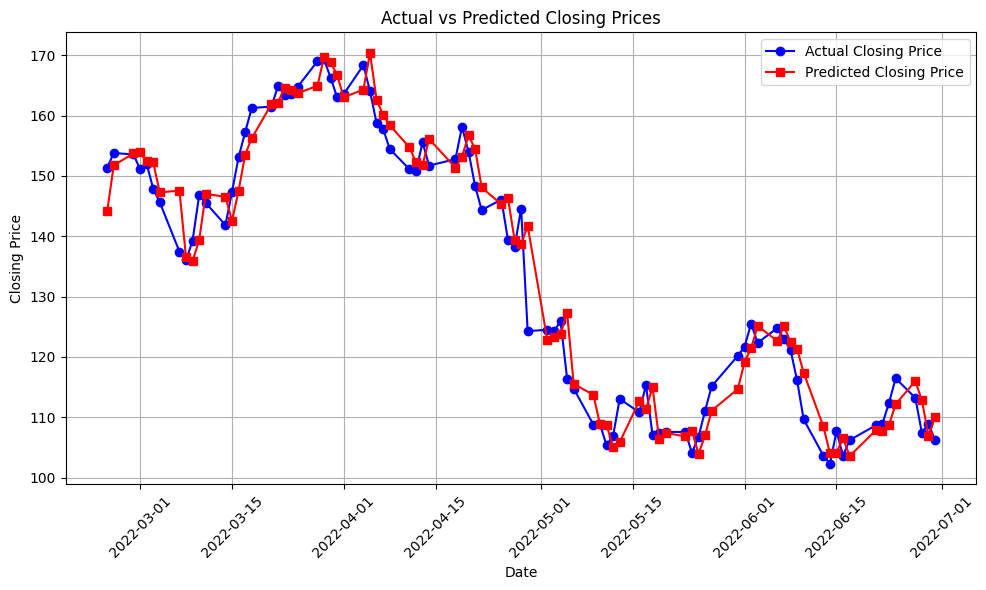

Root Mean Squared Error (RMSE): 4.386544517588721


In [ ]:
#plotting prediction results for Amazon
import matplotlib.pyplot as plt
desired_company = "AMZN"
filtered_data = test_data[test_data["Symbol"]== desired_company]
filtered_X = filtered_data[feature_columns]
filtered_y = filtered_data['Close']
y_pred = linear_model.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


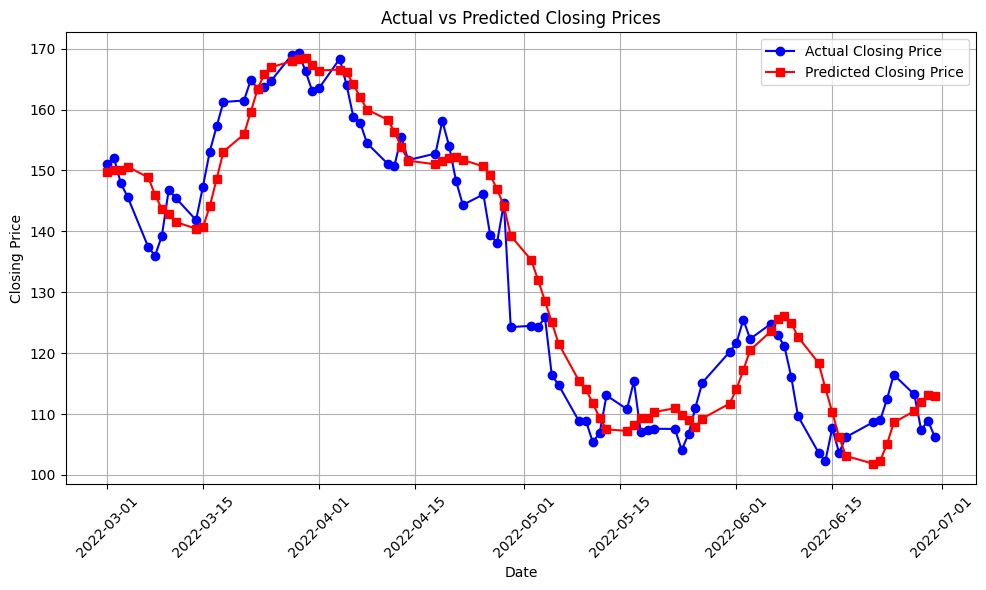

Root Mean Squared Error (RMSE): 6.124622116108507


In [ ]:

#plotting
desired_company = "AMZN"
filtered_data2 = test_data2[test_data2["Symbol"]== desired_company]
filtered_X = filtered_data2[feature_columns2]
filtered_y = filtered_data2['Close']
y_pred = linear_model2.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data2["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data2["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


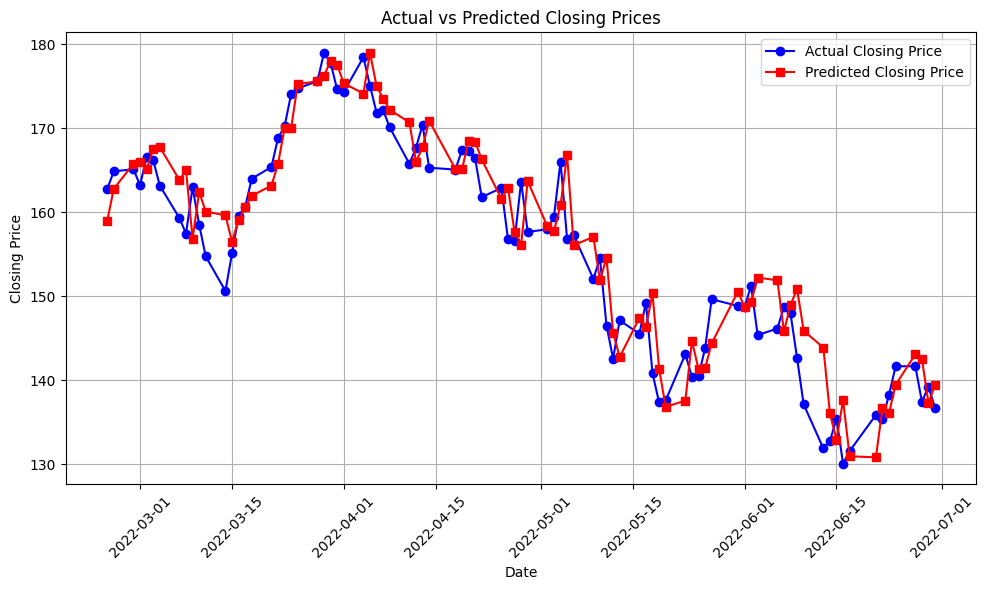

Root Mean Squared Error (RMSE): 4.295004220652819


In [ ]:
#plotting prediction results for Apple Inc
import matplotlib.pyplot as plt
desired_company = "AAPL"
filtered_data = test_data[test_data["Symbol"]== desired_company]
filtered_X = filtered_data[feature_columns]
filtered_y = filtered_data['Close']
y_pred = linear_model.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

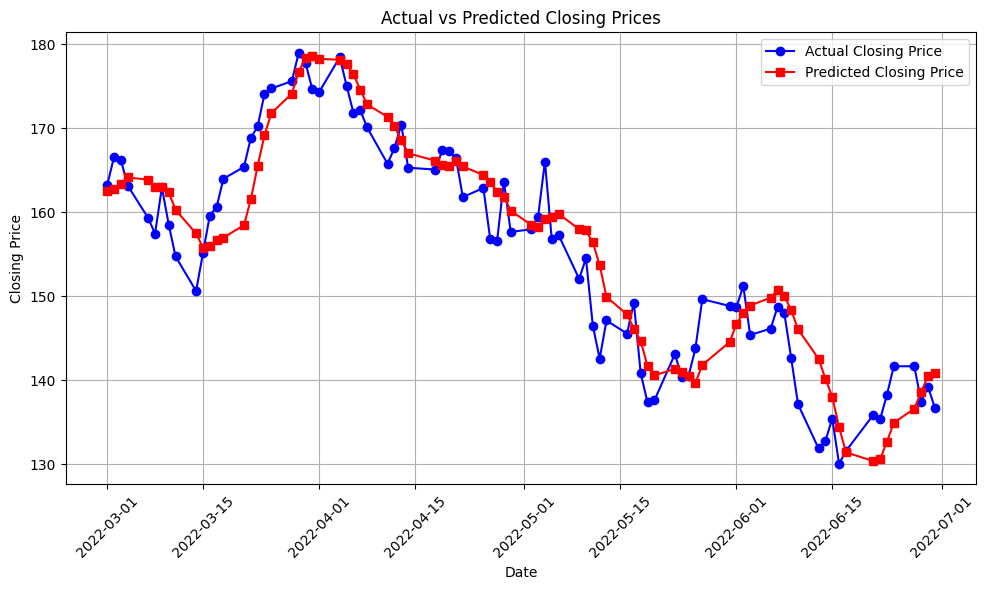

Root Mean Squared Error (RMSE): 4.428080993939442


In [ ]:
desired_company = "AAPL"
filtered_data2 = test_data2[test_data2["Symbol"]== desired_company]
filtered_X = filtered_data2[feature_columns2]
filtered_y = filtered_data2['Close']
y_pred = linear_model2.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data2["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data2["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

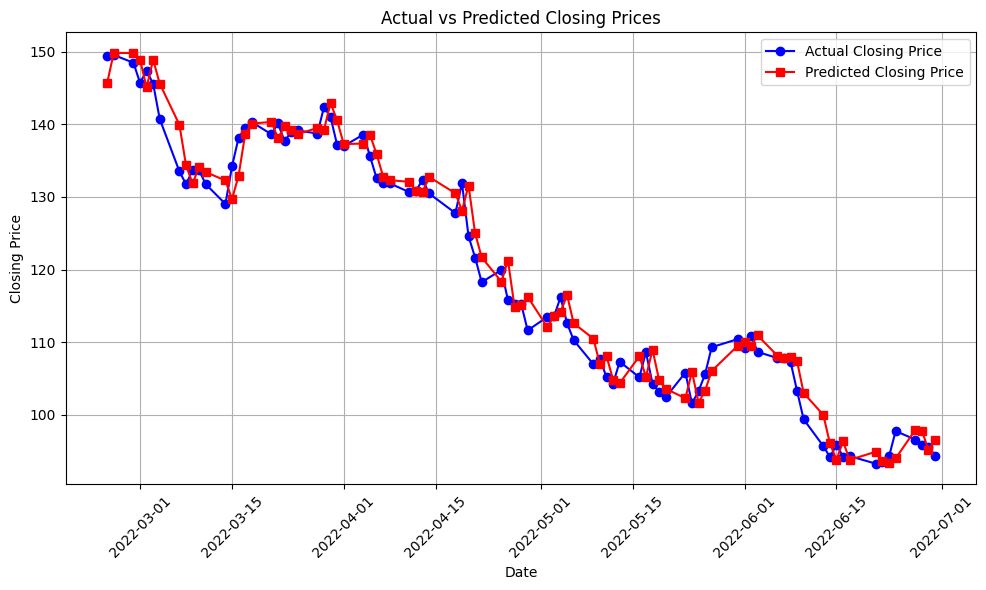

Root Mean Squared Error (RMSE): 2.709016961862627


In [ ]:
#plotting prediction results for Disney
import matplotlib.pyplot as plt
desired_company = "DIS"
filtered_data = test_data[test_data["Symbol"]== desired_company]
filtered_X = filtered_data[feature_columns]
filtered_y = filtered_data['Close']
y_pred = linear_model.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

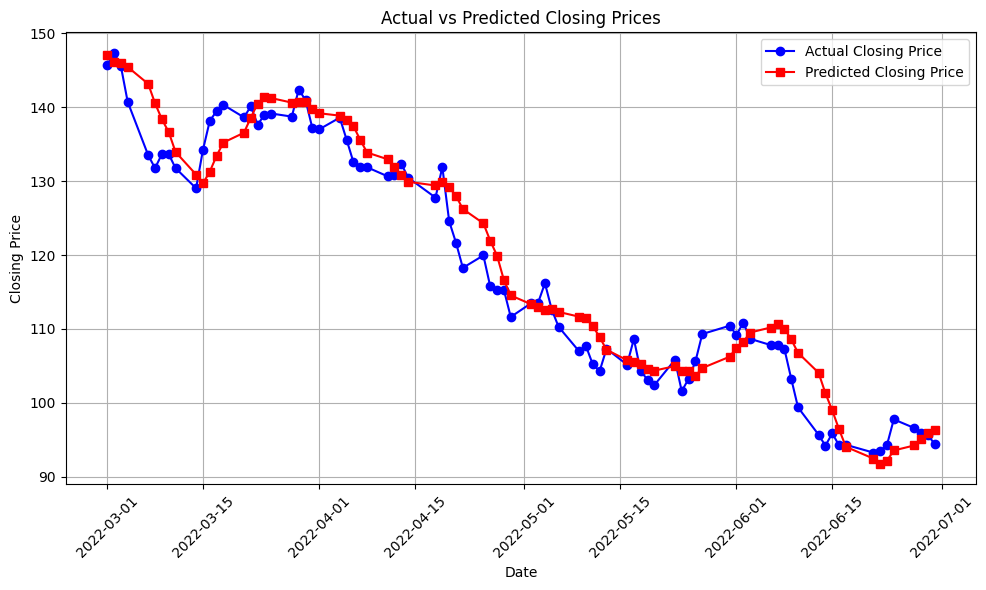

Root Mean Squared Error (RMSE): 3.6655751433316284


In [ ]:
desired_company = "DIS"
filtered_data2 = test_data2[test_data2["Symbol"]== desired_company]
filtered_X = filtered_data2[feature_columns2]
filtered_y = filtered_data2['Close']
y_pred = linear_model2.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data2["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data2["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

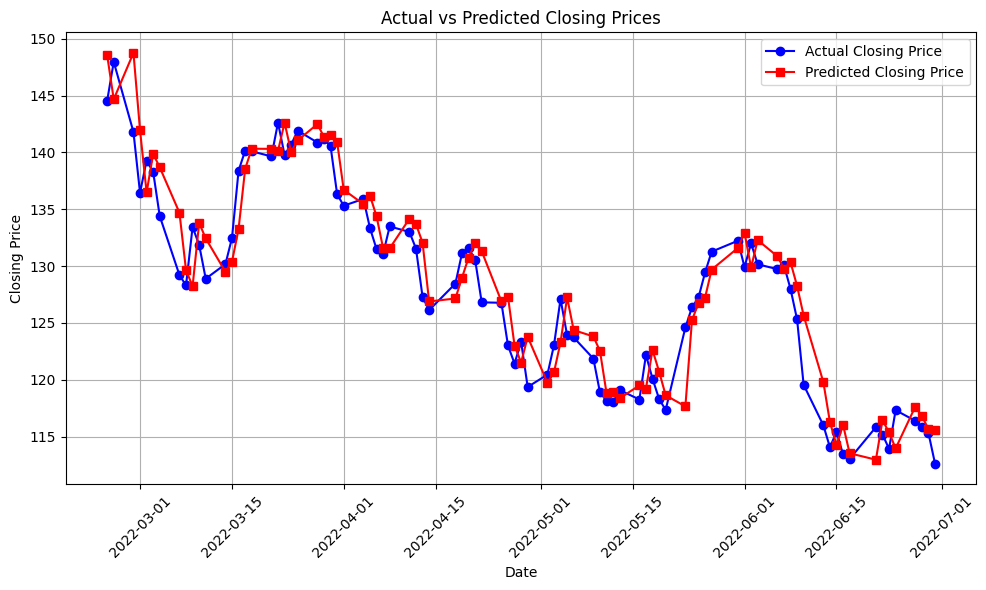

Root Mean Squared Error (RMSE): 2.7705653375704538


In [ ]:
#plotting prediction results for JPMorgan Chase
desired_company = "JPM"
filtered_data = test_data[test_data["Symbol"]== desired_company]
filtered_X = filtered_data[feature_columns]
filtered_y = filtered_data['Close']
y_pred = linear_model.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

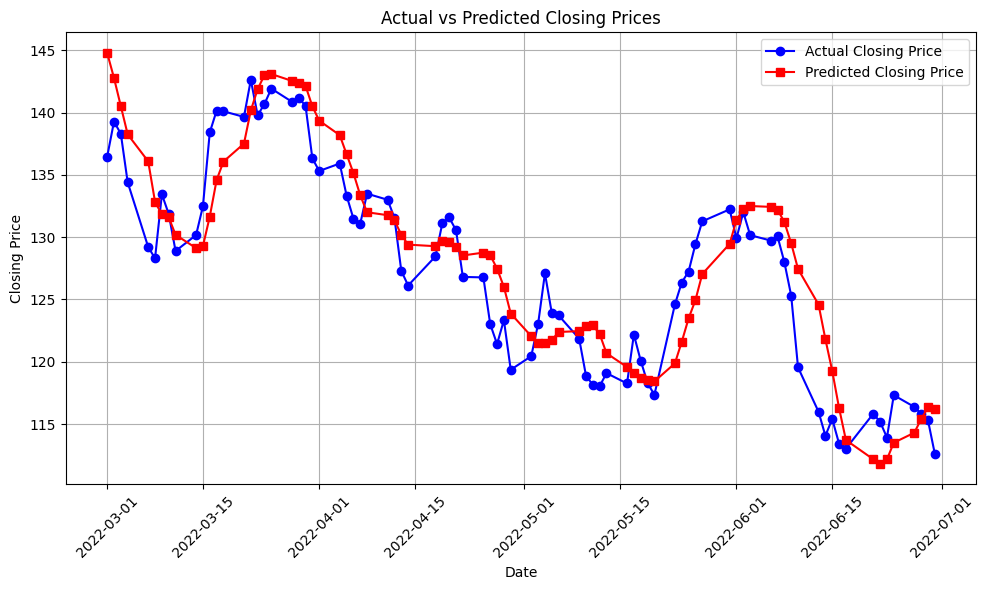

Root Mean Squared Error (RMSE): 3.526499019175679


In [ ]:
desired_company = "JPM"
filtered_data2 = test_data2[test_data2["Symbol"]== desired_company]
filtered_X = filtered_data2[feature_columns2]
filtered_y = filtered_data2['Close']
y_pred = linear_model2.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data2["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data2["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

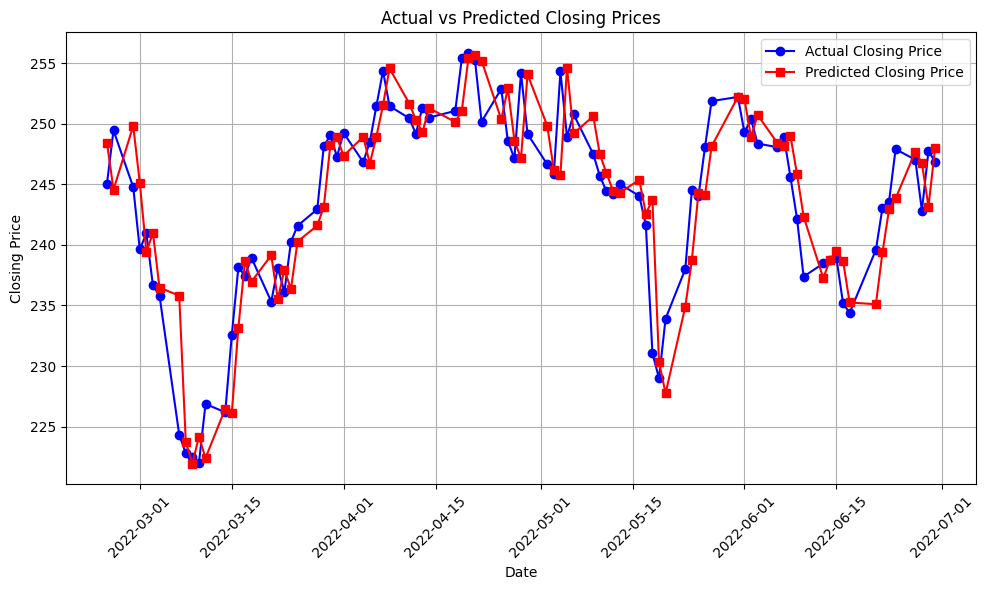

Root Mean Squared Error (RMSE): 3.6647971147287817


In [ ]:
#plotting prediction results for McDonald's
desired_company = "MCD"
filtered_data = test_data[test_data["Symbol"]== desired_company]
filtered_X = filtered_data[feature_columns]
filtered_y = filtered_data['Close']
y_pred = linear_model.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

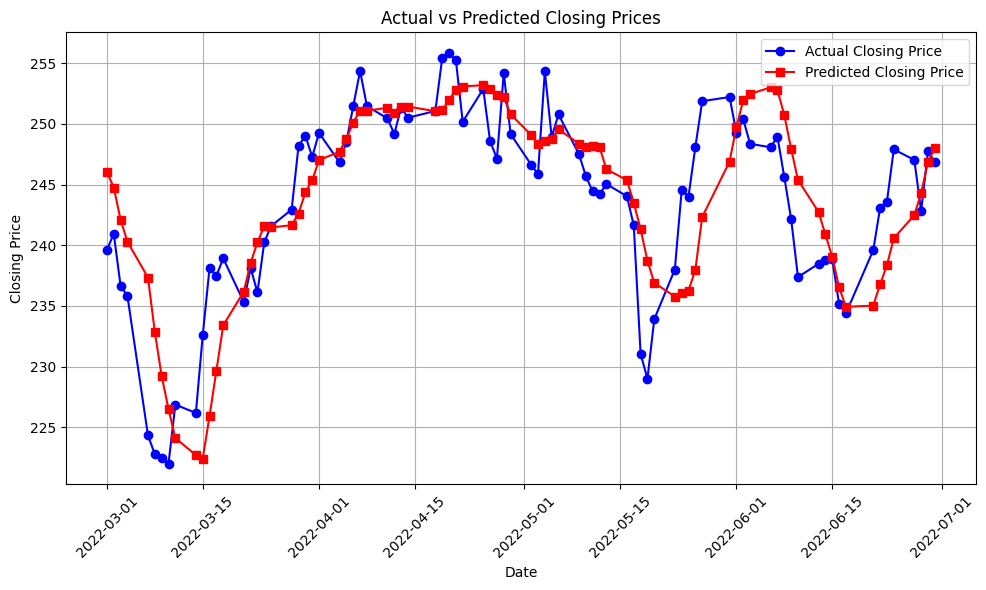

Root Mean Squared Error (RMSE): 4.8941265370521485


In [ ]:
desired_company = "MCD"
filtered_data2 = test_data2[test_data2["Symbol"]== desired_company]
filtered_X = filtered_data2[feature_columns2]
filtered_y = filtered_data2['Close']
y_pred = linear_model2.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data2["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data2["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

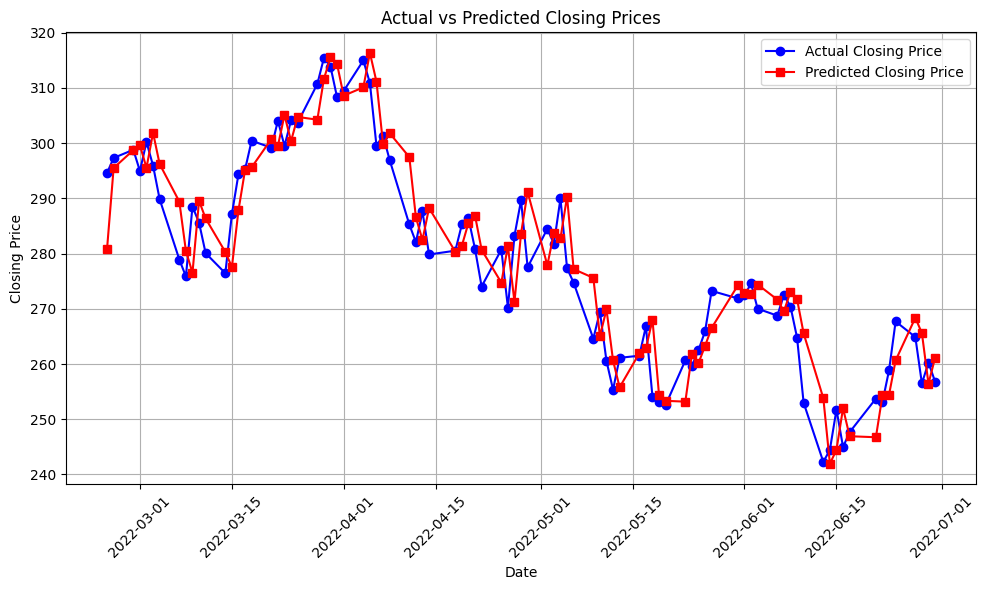

Root Mean Squared Error (RMSE): 6.501727384941364


In [ ]:
#plotting prediction results for Microsoft
desired_company = "MSFT"
filtered_data = test_data[test_data["Symbol"]== desired_company]
filtered_X = filtered_data[feature_columns]
filtered_y = filtered_data['Close']
y_pred = linear_model.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

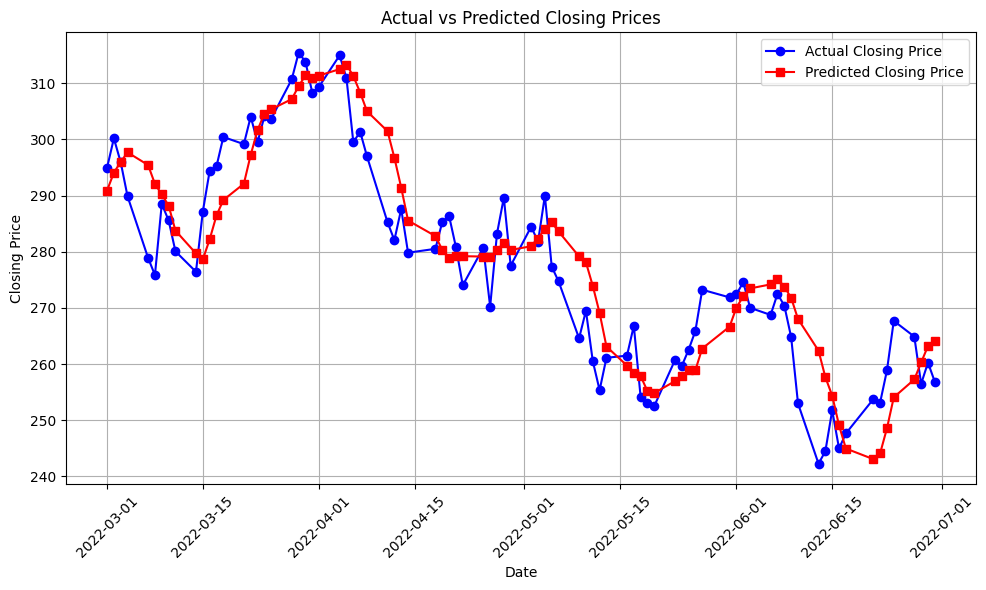

Root Mean Squared Error (RMSE): 7.730609599543695


In [ ]:
desired_company = "MSFT"
filtered_data2 = test_data2[test_data2["Symbol"]== desired_company]
filtered_X = filtered_data2[feature_columns2]
filtered_y = filtered_data2['Close']
y_pred = linear_model2.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data2["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data2["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

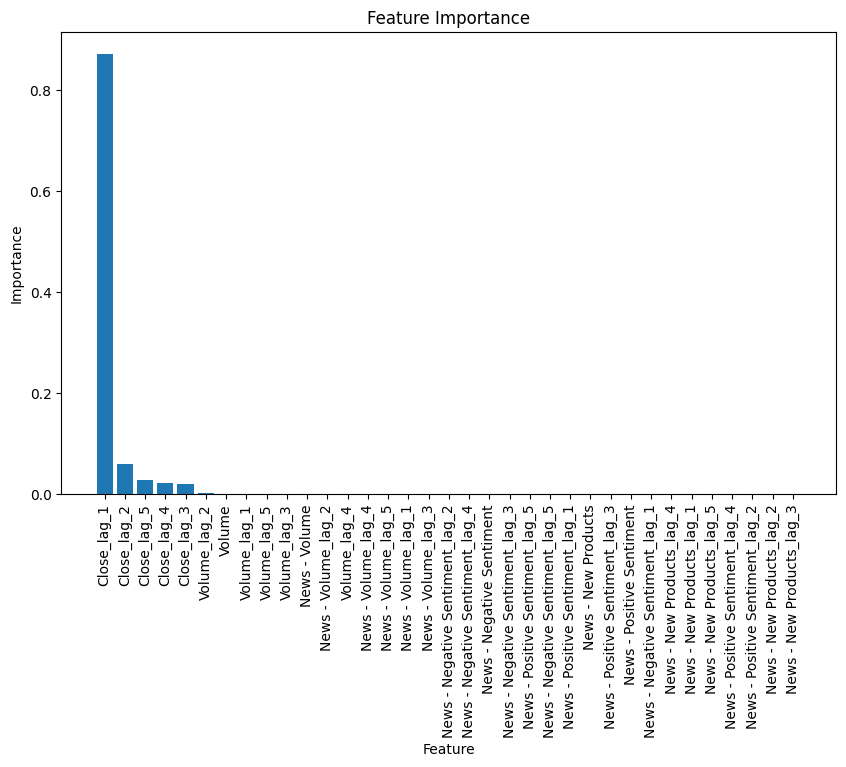

In [ ]:
#random forest as a baseline
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Training a Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting on the validation set
y_pred_rf = random_forest_model.predict(X_valid)

# Calculating the RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
rmse_rf

#Evaluating performance
rmse_scores_rf = []
mae_scores_rf = []
mape_scores_rf = []
y_pred = random_forest_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Fold RMSE: {rmse}")
rmse_scores_rf.append(rmse)
mae = mean_absolute_error(y_valid, y_pred)
mae_scores_rf.append(mae)

mape = np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100
mape_scores_rf.append(mape)
average_rmse = np.mean(rmse_scores_rf)
average_mae = np.mean(mae_scores_rf)
average_mape = np.mean(mape_scores_rf)

print('RMSE scores for each fold:', rmse_scores_rf)
print('MAE scores for each fold:', mae_scores_rf)
print('MAPE scores for each fold:', mape_scores_rf)
print('Average RMSE from cross-validation:', average_rmse)
print('Average MAE from cross-validation:', average_mae)
print('Average MAPE from cross-validation:', average_mape)

#plotting feature importance
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
#plotting prediction results for Disney
import matplotlib.pyplot as plt
desired_company = "DIS"
filtered_data = test_data[test_data["Symbol"]== desired_company]
filtered_X = filtered_data[feature_columns]
filtered_y = filtered_data['Close']
y_pred = random_forest_model.predict(filtered_X)
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date"], filtered_y, label='Actual Closing Price', color='blue', marker='o')
plt.plot(filtered_data["Date"], y_pred, label='Predicted Closing Price', color='red', marker='s')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
mse = mean_squared_error(filtered_y, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

NameError: name 'test_data' is not defined

In [ ]:
##LSTM
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

# Assuming train_data and test_data are already defined

# 1. Feature Scaling
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
base_columns=['Volume', 'News - Volume', 'News - Positive Sentiment', 'News - Negative Sentiment', 'News - New Products']
close_lag_columns = [f'Close_lag_{lag}' for lag in range(1, 6)]
base_lag_columns = []
directional_accuracy_scores = []
for col in base_columns:
    base_lag_columns.extend([f'{col}_lag_{lag}' for lag in range(1, 6)])

# Combine base feature columns with lagged feature columns
feature_columns = base_columns + close_lag_columns + base_lag_columns +['SMA_5']


# Combine base feature columns with lagged feature columns
feature_columns = base_columns + close_lag_columns
#X_train = train_data.drop(['Date', 'Close', 'Security'], axis=1)
X_train = train_data[feature_columns]
y_train = train_data['Close'].values.reshape(-1, 1)

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
# Setup for cross-validation
tscv = TimeSeriesSplit(n_splits=10)
rmse_scores = []

for train_index, test_index in tscv.split(X_train_scaled):
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_train_scaled[train_index], y_train_scaled[test_index]

    # 2. Preparing Sequence Data
    n_input = 10  # Use 5 days of data to predict the next day
    n_features = X_train_scaled.shape[1]
    #generator = TimeseriesGenerator(X_train_scaled, y_train_scaled, length=n_input, batch_size=1)
    train_generator = TimeseriesGenerator(X_train_fold, y_train_fold, length=n_input, batch_size=1)
    test_generator = TimeseriesGenerator(X_test_fold, y_test_fold, length=n_input, batch_size=1)

    # 3. Building the LSTM Model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))  # More neurons and add another LSTM layer
    model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # 4. Training the Model
    model.fit(train_generator, epochs=1, batch_size=32)
 # 5. Evaluating the Model
    predictions_scaled = model.predict(test_generator)
    predictions = scaler_y.inverse_transform(predictions_scaled)

    # Get the true values in the original scale
    y_test_true = scaler_y.inverse_transform(y_test_fold[n_input:])

    rmse = np.sqrt(mean_squared_error(y_test_true, predictions))
    rmse_scores.append(rmse)
    directional_accuracy = np.mean(np.sign(y_test_true) == np.sign(predictions)) * 100
    directional_accuracy_scores.append(directional_accuracy)

# Calculate the average RMSE across all folds
average_rmse = np.mean(rmse_scores)
average_directionality = np.mean(directional_accuracy_scores)
print('RMSE scores for each fold:', rmse_scores)
print('Average RMSE from cross-validation:', average_rmse)
print('Average directionality from cross-validation:', average_directionality)
# 5. Evaluating the Model
# Prepare the test data in the same way as the training data
#X_test = test_data.drop(['Date', 'Close', 'Security'], axis=1)
#y_test = test_data['Close'].values.reshape(-1, 1)

#X_test_scaled = scaler_X.transform(X_test)
#y_test_scaled = scaler_y.transform(y_test)

#test_generator = TimeseriesGenerator(X_test_scaled, y_test_scaled, length=n_input, batch_size=1)

# Predict using the LSTM model
#predictions_scaled = model.predict(test_generator)
predictions = scaler_y.inverse_transform(predictions_scaled)

# Calculate RMSE
#y_test_true = y_test[n_input:]
#rmse = np.sqrt(mean_squared_error(y_test_true, predictions))
#print('Test RMSE:', rmse)

15606/15606 [==============================] - 95s 6ms/step
RMSE scores for each fold: [267.46262672059765, 287.3151611505071, 298.22573621704703, 317.7298586499499, 324.63396488065223, 344.3572878505514, 353.63860243262167, 353.68920539038237, 374.3239743972182, 348.0498253007434]
Average RMSE from cross-validation: 326.9426242990271
Average directionality from cross-validation: 100.0


In [ ]:
directional_accuracy_scores

[100.0, 100.0, 100.0, 100.0, 100.0]

In [ ]:
#Rolling mean to help smooth-out short term fluctuations for denoising
df['Close'] = df['Close'].rolling(window=5).mean()

In [ ]:
# Using statistical bounds for outliers
rolling_std = df['Close'].rolling(window=20).std()
mean_close = df['Close'].rolling(window=20).mean()
upper_bound = mean_close + (2 * rolling_std)
lower_bound = mean_close - (2 * rolling_std)

# Mark data points outside of the bounds as outliers
df['Outlier'] = (df['Close'] > upper_bound) | (df['Close'] < lower_bound)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize data as time-based models like lstm are sensitive to scale of data
scaler = MinMaxScaler()

# scaling the 'Close' and 'Volume' features
df[['Close', 'Volume']] = scaler.fit_transform(df[['Close', 'Volume']])

In [ ]:
df.isna().sum()

In [ ]:
# prompt: number of unique gics sector

df['GICS Sub-Industry'].nunique()


120

In [ ]:
# prompt: number of unique security

print(df['Symbol'].value_counts().sort_values())


CEG     113
OGN     285
DXC     441
ABMD    441
ACN     441
       ... 
ZBH     441
ZION    441
VFC     441
VRTX    441
ICE     441
Name: Symbol, Length: 495, dtype: int64


CEG and OGN are the 2 out of 495 that do not start on the same day as the other 493 on 30/9/2020
CEG start count on 19/1/2022
OEG start count on 14/5/2021


In [ ]:
df = df.sort_values(by=['Security', 'Date'])
df['Close_Change'] = df.groupby('Security')['Close'].diff()
print(df)

            Date       Close   Volume Symbol Security             GICS Sector  \
253    1/10/2021  176.679993  2419300    MMM       3M             Industrials   
274    1/11/2021  179.580002  2010500    MMM       3M             Industrials   
43     1/12/2020  170.520004  3859600    MMM       3M             Industrials   
295    1/12/2021  170.729996  3255600    MMM       3M             Industrials   
84      1/2/2021  174.699997  2569700    MMM       3M             Industrials   
...          ...         ...      ...    ...      ...                     ...   
70846   9/6/2021   65.959999  6124100   EBAY     eBay  Consumer Discretionary   
71099   9/6/2022   46.689999  5139100   EBAY     eBay  Consumer Discretionary   
70867   9/7/2021   69.459999  5263600   EBAY     eBay  Consumer Discretionary   
70888   9/8/2021   65.349998  7186400   EBAY     eBay  Consumer Discretionary   
70910   9/9/2021   73.000000  5164200   EBAY     eBay  Consumer Discretionary   

                        GIC

In [ ]:
df2.isna().sum()

Unnamed: 0                0
Symbol                    0
Security                  0
SEC filings               0
GICS Sector               0
GICS Sub-Industry         0
Headquarters Location     0
Date first added         47
CIK                       0
Founded                   0
Wikidata ID               0
dtype: int64